### Multi Linear Regression 
This notebook is a quick demonstration of the multiple linear regression model<br><br> A multiple linear model is defined as <br> y = B<sub>0+</sub> B<sub>1</sub>X<sub>1</sub> + B<sub>2</sub>X<sub>2</sub> + ... + B<sub>n</sub>X<sub>n</sub> <br><br> While working with MLR we need to make sure about the below points<br>* Avoid Overfitting <br> * Correct Feature Selection to avoid multicolinearilty <br><br> Mutlicolinearity can be identified by <br> * Examining the scatter plots between different features to identify any patterns <br> * Examining the coorelation using heatmaps <br><br> However using parwise analysis might not be useful since the predictor variable might be explained by many other variables <br><br> VIF (Variance Inflation Fator) for a feature helps to quantify the predicability of that feature using oher features <br> VIF = 1/(1-R<sup>2</sup>), should be typically less than 5 <br> If VIF is more than 5 then that he predictor variable can be explained by other predictor variables and should be dropped from the model

### Dealing with categorical variables <br>
We can create dummy binary variables to handle non-ordinal categorical variables using pd.get_dummies() 


### Scaling numerical features
Feature scaling affects the coefficients of the features <br>
Feature scaling helps in faster convergence of the gradient descent algorithms <br>
Feature scaling does not affect other parameters such as t-statistics, f-statistics, p-values, r-squared values

### Model Evaluation

The metrics used to evaluate multilinear regression models is <br> * Adjusted R<sup>2</sup> <br> * AIC <br> Adjusted R<sup>2</sup> & AIC penalize the R-squared R<sup>2</sup> term based on the number of features used in the model <br> Ajusted R<sup>2</sup> = 1 - (1-R<sup>2</sup>)(N-1)/(N-p-1) <br> AIC = 2 * p + n * log(RSS/n)

### Feature Selection

Steps associated with manual feature elimination:<br>

* Build the model with all the features
* Drop the features that are least helpful in prediction (high p-value)
* Drop the features that are redundant (using correlations and VIF)
  * Use RFE or PCA
* Rebuild model and repeat

Some of the methods for feature selection are:
* Top 'n' feaures : Recursive Feature Elimination (RFE)
* Forward / Backward / Stepwise Selection : based on AIC
* Regularization (Lasso / Ridge)

### Problem Statement
A real estate company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc. <br> Essentially, the company wants: <br> 
* To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
* To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
* To know the accuracy of the model, i.e. how well do these variables predict the house price

In this exercise we shall look at the below methods for model feature selections
* P-Values and Variance Inflation Factor
* Recursive Feature Elimination 

### 0. Import the required libraries and dataset

In [35]:
# Data processing libraires
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine learning libraries (Stats Model)
import statsmodels
import statsmodels.api as sm

# Machine learning libraries (Scikit Learn)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 


In [2]:
data = pd.read_csv(r'./data/housing.csv')
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### 1. Perform EDA on the dataset

<Figure size 1500x1500 with 0 Axes>

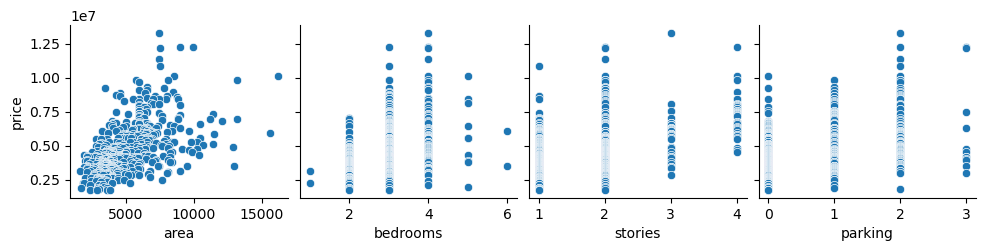

In [6]:
# Visualizing the data (numerical variables)
plt.figure(figsize = (15,15))
sns.pairplot(
                data = data, 
                y_vars = 'price',
                x_vars = ('area','bedrooms','stories','parking'),
                kind = 'scatter')
plt.show()

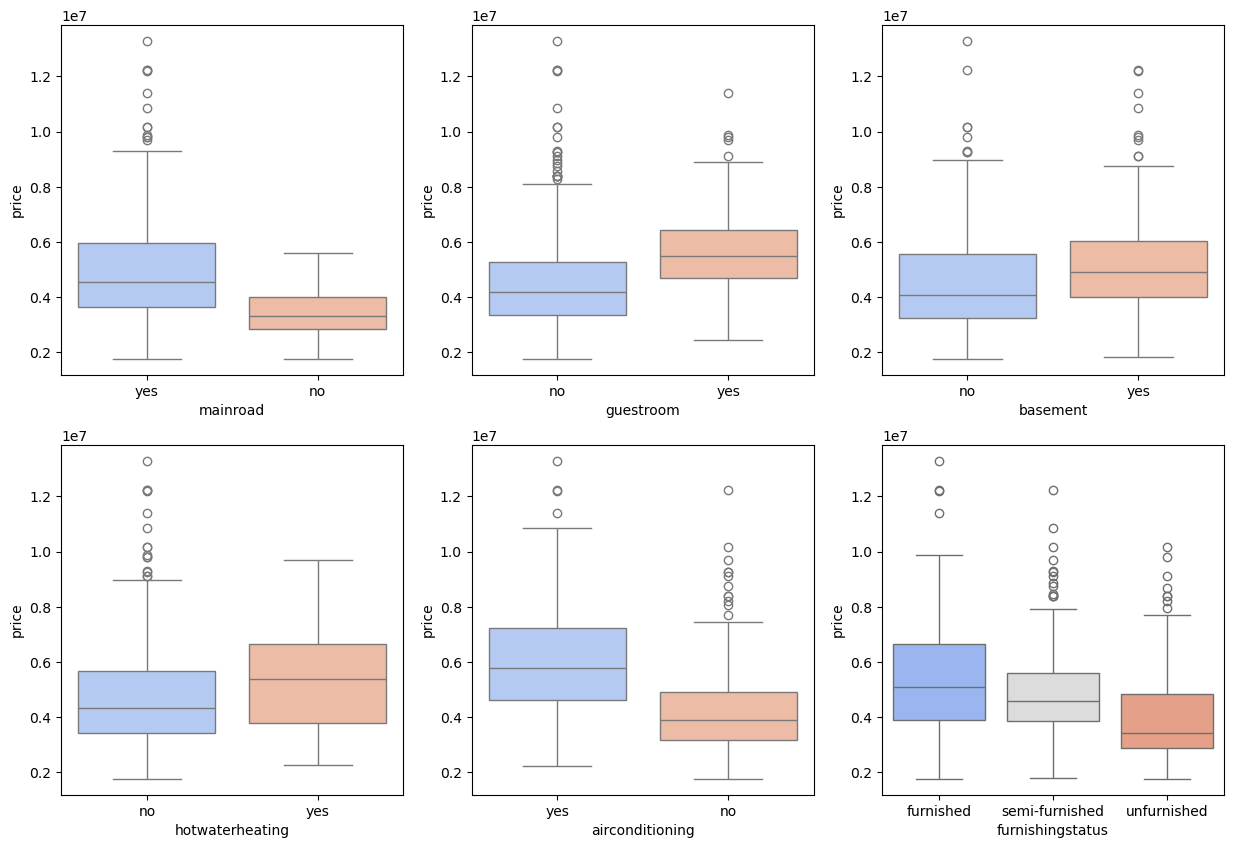

In [7]:
# Visualizing the data (categorical variables)
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(data = data, x = 'mainroad', y = 'price', hue = 'mainroad', palette='coolwarm')
plt.subplot(2,3,2)
sns.boxplot(data = data, x = 'guestroom', y = 'price', hue = 'guestroom', palette='coolwarm')
plt.subplot(2,3,3)
sns.boxplot(data = data, x = 'basement', y = 'price', hue = 'basement', palette='coolwarm')
plt.subplot(2,3,4)
sns.boxplot(data = data, x = 'hotwaterheating', y = 'price', hue = 'hotwaterheating', palette='coolwarm')
plt.subplot(2,3,5)
sns.boxplot(data = data, x = 'airconditioning', y = 'price', hue = 'airconditioning', palette='coolwarm')
plt.subplot(2,3,6)
sns.boxplot(data = data, x = 'furnishingstatus', y = 'price', hue = 'furnishingstatus', palette='coolwarm')
plt.show()

### 2. Preparing the data for modelling

### 2.1 Handling categorical data

In [8]:
def func_yes_no(x):
    return x.map({'yes': 1, 'no': 0})

data['mainroad'] = func_yes_no(data['mainroad'])
data['guestroom'] = func_yes_no(data['guestroom'])
data['basement'] = func_yes_no(data['basement'])
data['hotwaterheating'] = func_yes_no(data['hotwaterheating'])
data['airconditioning'] = func_yes_no(data['airconditioning'])

data_furnishingstatus = pd.get_dummies(data['furnishingstatus'], dtype=int)
data = pd.concat([data, data_furnishingstatus], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,1,0,0


In [9]:
data.drop('semi-furnished', axis=1, inplace=True)

### Train Test Split

In [10]:
df_train, df_test = train_test_split(data.drop(['prefarea'], axis=1), train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

Rescaling of the features is preferred since the scale of features is very different compared to each other <br> Area, Price, Number Of Bedroom are all at different magnitudes <br> There are two standard ways of rescaling the features <br>
* Min-Max Scalar (Values are standardized between 0 & 1)
   * Min-Max Scalar hanldes outlier
* Standard Scalar (Valuesa are standardized such that mean is 0 and standard deviation is 1) <br>
<br> We shall use Min-Max Scalar

In [11]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,0,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,1,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,1,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,1


In [12]:
num_var = df_train.select_dtypes(include=['float64', 'int64']).columns
scalar = MinMaxScaler()
scalar.fit(df_train[num_var])
df_train[num_var] = scalar.transform(df_train[num_var])
df_test[num_var] = scalar.transform(df_test[num_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0,0
159,0.321212,0.115628,0.4,0.5,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,1,0
35,0.548133,0.454417,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1,0
28,0.575758,0.538015,0.8,0.5,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0,1


In [13]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.259843,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.439125,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Training the model

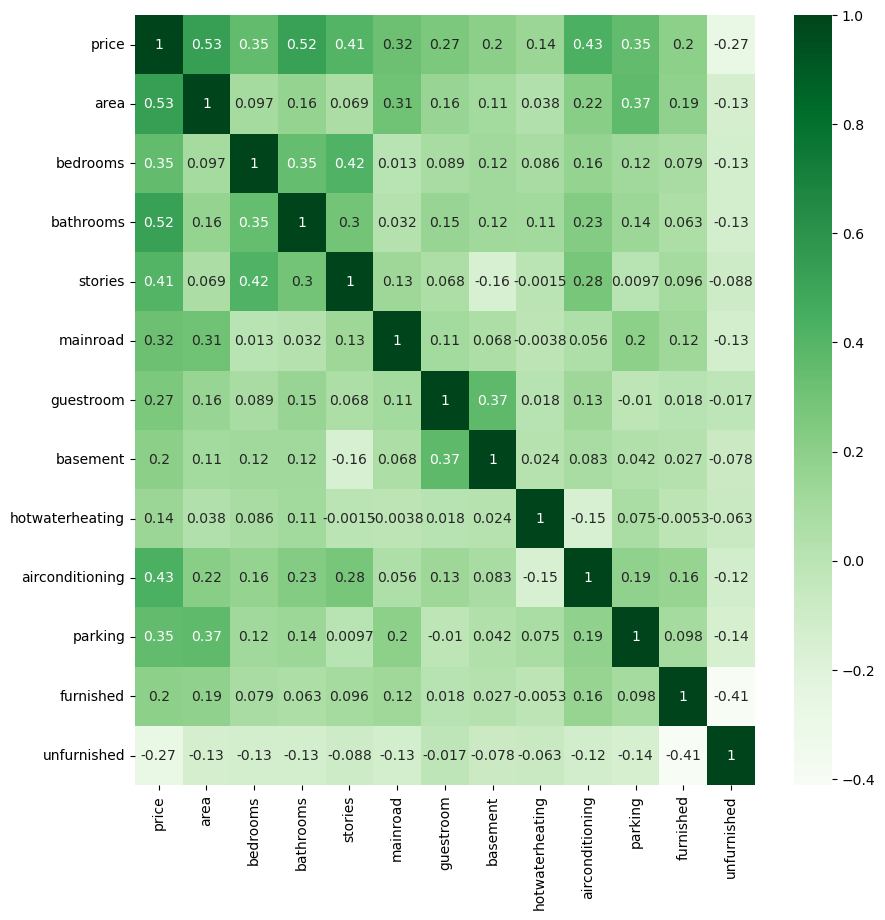

In [14]:
# Identify the correlation between the feature variables
plt.figure(figsize=(10,10))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Greens')
plt.show()

### 3.1 Building the model iteratively

#### 3.1.1 Using Area as the first feature since it has the highest correlation with price
It explains about 28% of the variation in the data

In [15]:
# Price has the highest correlation with area
y_train = df_train['price']
X_train = df_train['area']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.15e-29
Time:                        09:19:58   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.2.2 Using bathrooms and airconditioning as the next incremental set of features
Using Area, Bathrooms and Airconditining covers about 54% of the dataset

In [16]:
X_train = df_train[['area','bathrooms','airconditioning']]
y_train = df_train['price']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           6.61e-63
Time:                        10:09:12   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.2.3 Adding all the variables to build the model

Feature selection is defined as the following iterative process in the following order
* Drop variable with high p-value and high VIF
* Drop variable with high p-value and low VIF
* Drop variable wih low p-value and high VIF


In [21]:
X_train = df_train.drop(labels=['price'], axis=1)
X_train = sm.add_constant(X_train)
y_train = df_train['price']
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     59.38
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.01e-78
Time:                        10:12:43   Log-Likelihood:                 369.04
No. Observations:                 381   AIC:                            -712.1
Df Residuals:                     368   BIC:                            -660.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0152      0.020      0.771      0.441      -0.024       0.054
area                0.2666      0.030      8.772      0.000       0.207       0.326
bedrooms            0.0495      0.038      1.300      0.195      -0.025       0.124
bathrooms           0.1886      0.023      8.309      0.000       0.144       0.233
stories             0.1139      0.020      5.765      0.000       0.075       0.153
mainroad            0.0573      0.015      3.894      0.000       0.028       0.086
guestroom           0.0340      0.014      2.423      0.016       0.006       0.062
basement            0.0303      0.011      2.670      0.008       0.008       0.053
hotwaterheating     0.0751      0.022      3.384      0.001       0.031       0.119
airconditioning     0.0666      0.012      5.690      0.000       0.044       0.090
parking             0.0586      0.019      3.144      0.002       0.022       0.095
furnished          -0.0003      0.012     -0.029      0.977      -0.024       0.024
unfurnished        -0.0332      0.011     -2.902      0.004      -0.056      -0.011
==============================================================================
Omnibus:                       92.766   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.866
Skew:                           1.072   Prob(JB):                     1.40e-67
Kurtosis:                       6.846   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Generating VIF for the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,16.94
4,stories,1.48
2,bedrooms,1.37
1,area,1.32
7,basement,1.28
3,bathrooms,1.26
9,airconditioning,1.25
11,furnished,1.25
12,unfurnished,1.25
10,parking,1.23


In [23]:
# Create model removing the variable with highest p-values
X_train = df_train.drop(labels=['furnished','price'], axis=1)
y_train = df_train['price']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     64.96
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.44e-79
Time:                        10:13:47   Log-Likelihood:                 369.04
No. Observations:                 381   AIC:                            -714.1
Df Residuals:                     369   BIC:                            -666.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0151      0.019      0.776      0.438      -0.023       0.053
area                0.2665      0.030      8.839      0.000       0.207       0.326
bedrooms            0.0495      0.038      1.301      0.194      -0.025       0.124
bathrooms           0.1886      0.023      8.325      0.000       0.144       0.233
stories             0.1139      0.020      5.774      0.000       0.075       0.153
mainroad            0.0573      0.015      3.900      0.000       0.028       0.086
guestroom           0.0340      0.014      2.427      0.016       0.006       0.062
basement            0.0303      0.011      2.674      0.008       0.008       0.053
hotwaterheating     0.0751      0.022      3.389      0.001       0.032       0.119
airconditioning     0.0666      0.012      5.717      0.000       0.044       0.089
parking             0.0586      0.019      3.150      0.002       0.022       0.095
unfurnished        -0.0330      0.011     -3.136      0.002      -0.054      -0.012
==============================================================================
Omnibus:                       92.732   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.554
Skew:                           1.072   Prob(JB):                     1.64e-67
Kurtosis:                       6.844   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Generating VIF for the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,16.59
4,stories,1.48
2,bedrooms,1.37
1,area,1.30
7,basement,1.28
3,bathrooms,1.26
9,airconditioning,1.24
10,parking,1.23
6,guestroom,1.22
5,mainroad,1.17


In [25]:
# Create model removing the variable furnished and bedrooms with highest p-values
X_train = df_train.drop(labels = ['furnished','bedrooms','price'], axis=1)
X_train = sm.add_constant(X_train)
y_train = df_train['price']
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     71.15
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           6.47e-80
Time:                        10:14:20   Log-Likelihood:                 368.17
No. Observations:                 381   AIC:                            -714.3
Df Residuals:                     370   BIC:                            -671.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0310      0.015      2.036      0.042       0.001       0.061
area                0.2670      0.030      8.848      0.000       0.208       0.326
bathrooms           0.1946      0.022      8.758      0.000       0.151       0.238
stories             0.1238      0.018      6.788      0.000       0.088       0.160
mainroad            0.0557      0.015      3.798      0.000       0.027       0.084
guestroom           0.0337      0.014      2.400      0.017       0.006       0.061
basement            0.0328      0.011      2.933      0.004       0.011       0.055
hotwaterheating     0.0767      0.022      3.462      0.001       0.033       0.120
airconditioning     0.0663      0.012      5.688      0.000       0.043       0.089
parking             0.0608      0.019      3.280      0.001       0.024       0.097
unfurnished        -0.0338      0.011     -3.211      0.001      -0.055      -0.013
==============================================================================
Omnibus:                       96.549   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.744
Skew:                           1.113   Prob(JB):                     3.04e-71
Kurtosis:                       6.937   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Generating VIF for the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,10.09
1,area,1.30
3,stories,1.26
6,basement,1.24
8,airconditioning,1.24
5,guestroom,1.22
9,parking,1.22
2,bathrooms,1.21
4,mainroad,1.16
7,hotwaterheating,1.06


### 4. Residual Analysis on the training set

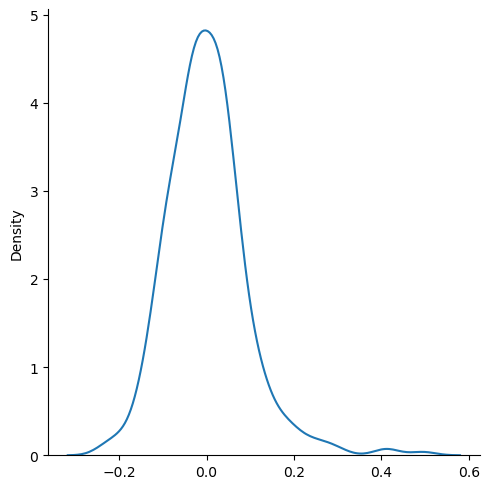

In [27]:
y_pred = model.predict(X_train)
res = y_train - y_pred
sns.displot(res, kind = 'kde')
plt.show()

In [28]:
r_squared_score = r2_score(y_train,y_pred)
print(r_squared_score)

0.657884657453272


In [29]:
model.params.index.tolist()

['const',
 'area',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'unfurnished']

### 5. Evaluating the model on test data

In [32]:
# Creating x-test and y-test
y_test = df_test['price']
X_test = df_test.drop(labels='price', axis =1)
X_test = sm.add_constant(X_test)
X_test = X_test[model.params.index.tolist()]
y_pred = model.predict(X_test)

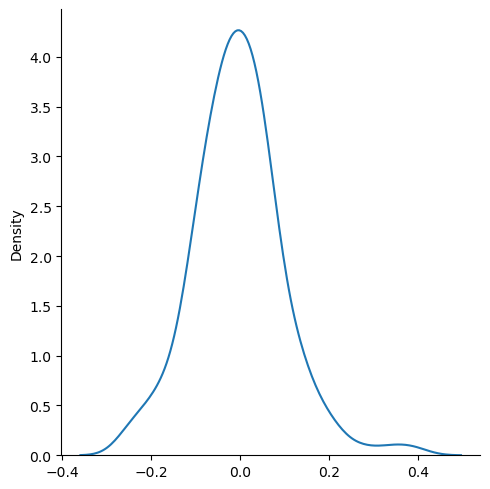

In [33]:
y_res_test = y_test - y_pred
sns.displot(y_res_test, kind = 'kde')
plt.show()

In [34]:
r_squared_score_test = r2_score(y_test, y_pred)
r_squared_score_test

0.657291143179358

### Using Recursive Feature Elimitation to build the model

In [70]:
# Initialize RFE
X_train = df_train.drop(labels=['price'], axis=1)
y_train = df_train['price']
sk_linear_model = LinearRegression()
sk_rfe = RFE(sk_linear_model, n_features_to_select=10)
sk_rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [71]:
# Understanding the importance of the features
df_rfe = pd.DataFrame(
                        {
                            'feature_name' : X_train.columns.tolist(),
                            'feature_selection' : sk_rfe.support_.tolist(),
                            'feature_ranking': sk_rfe.ranking_.tolist()
                        },
                    )
df_rfe.sort_values(by=['feature_ranking'])

,feature_name,feature_selection,feature_ranking
0,area,True,1
1,bedrooms,True,1
2,bathrooms,True,1
3,stories,True,1
4,mainroad,True,1
5,guestroom,True,1
7,hotwaterheating,True,1
8,airconditioning,True,1
9,parking,True,1
11,unfurnished,True,1


In [72]:
# Build the model
influential_columns = X_train.columns[sk_rfe.support_]
X_train = df_train[influential_columns]
y_train = df_train['price']
X_train = sm.add_constant(X_train)
stats_lm_model = sm.OLS(y_train, X_train).fit()


In [73]:
stats_lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     69.58
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           9.37e-79
Time:                        10:47:34   Log-Likelihood:                 365.39
No. Observations:                 381   AIC:                            -708.8
Df Residuals:                     370   BIC:                            -665.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0181      0.020      0.924      0.356      -0.020       0.057
area                0.2675      0.030      8.803      0.000       0.208       0.327
bedrooms            0.0667      0.038      1.763      0.079      -0.008       0.141
bathrooms           0.1932      0.023      8.481      0.000       0.148       0.238
stories             0.0989      0.019      5.186      0.000       0.061       0.136
mainroad            0.0596      0.015      4.029      0.000       0.031       0.089
guestroom           0.0472      0.013      3.567      0.000       0.021       0.073
hotwaterheating     0.0752      0.022      3.368      0.001       0.031       0.119
airconditioning     0.0688      0.012      5.873      0.000       0.046       0.092
parking             0.0576      0.019      3.072      0.002       0.021       0.094
unfurnished        -0.0346      0.011     -3.267      0.001      -0.055      -0.014
==============================================================================
Omnibus:                       90.547   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.541
Skew:                           1.059   Prob(JB):                     1.34e-63
Kurtosis:                       6.708   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Build the model (dropping the bedrooms columns since it has high p-value)
X_train = df_train[influential_columns].drop(labels='bedrooms', axis=1)
y_train = df_train['price']
X_train = sm.add_constant(X_train)
stats_lm_model = sm.OLS(y_train, X_train).fit()

In [76]:
stats_lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     76.53
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           4.80e-79
Time:                        10:50:32   Log-Likelihood:                 363.79
No. Observations:                 381   AIC:                            -707.6
Df Residuals:                     371   BIC:                            -668.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0404      0.015      2.695      0.007       0.011       0.070
area                0.2683      0.030      8.805      0.000       0.208       0.328
bathrooms           0.2019      0.022      9.056      0.000       0.158       0.246
stories             0.1108      0.018      6.201      0.000       0.076       0.146
mainroad            0.0576      0.015      3.891      0.000       0.028       0.087
guestroom           0.0482      0.013      3.636      0.000       0.022       0.074
hotwaterheating     0.0774      0.022      3.461      0.001       0.033       0.121
airconditioning     0.0687      0.012      5.844      0.000       0.046       0.092
parking             0.0606      0.019      3.235      0.001       0.024       0.097
unfurnished        -0.0359      0.011     -3.383      0.001      -0.057      -0.015
==============================================================================
Omnibus:                       95.061   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.089
Skew:                           1.109   Prob(JB):                     1.26e-67
Kurtosis:                       6.806   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Verifying the VIF for the variables
vif = pd.DataFrame()
vif['feature_name'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train,i) for i in range(len(X_train.columns))]
vif['vif'] = round(vif['vif'],2)
vif.sort_values(by=['vif'], ascending=False)

,feature_name,vif
0,const,9.64
1,area,1.30
7,airconditioning,1.24
8,parking,1.22
2,bathrooms,1.19
3,stories,1.19
4,mainroad,1.16
5,guestroom,1.07
6,hotwaterheating,1.06
9,unfurnished,1.06


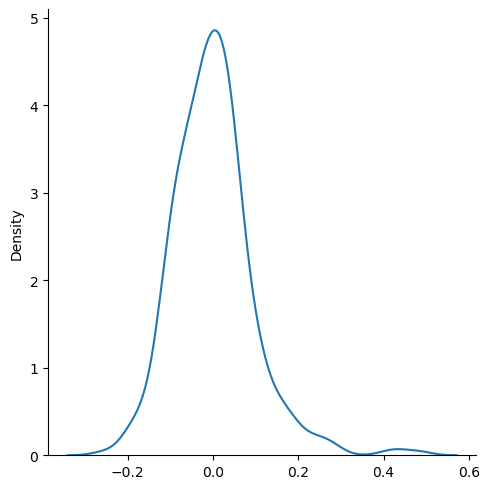

In [83]:
# Performing residual analysis on the training dataset
y_res = y_train - stats_lm_model.predict(X_train)
sns.displot(y_res, kind = 'kde')
plt.show()

In [84]:
print(r2_score(y_train, stats_lm_model.predict(X_train)))

0.6499325879301481


### Validating the model on the test set

In [88]:
X_train.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'unfurnished'],
      dtype='object')

In [89]:
y_test = df_test['price']
X_test = df_test[['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'unfurnished']]
X_test = sm.add_constant(X_test)
y_pred_test = stats_lm_model.predict(X_test)
y_res_test = y_test - y_pred_test

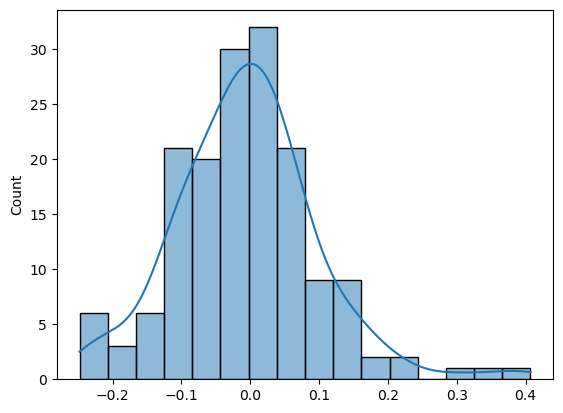

In [90]:
sns.histplot(y_res_test,kde=True)
plt.show()

In [91]:
print(r2_score(y_test, y_pred_test))

0.6371330443760385
